## Transfer Learning VGG 16 and VGG 19 using Keras

In [48]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [7]:
# re-size all the images to this
IMAGE_SIZE = [224,224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [8]:
# Import the Vgg 16 library as shown below and add preprocessing Layer to the front of VGG
# Here we will use imagenet weights
resnet = ResNet50(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False) 

94765736/94765736 [==============================] - 78s 1us/step


In [9]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [23]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

In [24]:
x = Flatten()(resnet.output)

In [25]:
prediction = Dense(len(folders), activation='softmax')(x)

# create model object
model = Model(inputs=resnet.input, outputs = prediction)

In [26]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [27]:
# tell the model what cost and optimization method to use
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [28]:
# use the image data generator to import the images from the dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [29]:
# Make sure you provide the same target size as initialized for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                  target_size =(224,224),
                                                  batch_size = 32,
                                                  class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [30]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [31]:
# fit the model
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 50,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

C:\conda_temp\ipykernel_15424\284548119.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 17s 9s/step - loss: 6.2383 - accuracy: 0.3750 - val_loss: 2.0090 - val_accuracy: 0.3621
Epoch 2/50
2/2 [==============================] - 12s 9s/step - loss: 5.0419 - accuracy: 0.3281 - val_loss: 11.1048 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 11s 8s/step - loss: 10.8036 - accuracy: 0.3125 - val_loss: 6.8117 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 13s 9s/step - loss: 6.0239 - accuracy: 0.3594 - val_loss: 3.1531 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 12s 8s/step - loss: 3.0137 - accuracy: 0.4062 - val_loss: 5.6137 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 12s 9s/step - loss: 5.0990 - accuracy: 0.3906 - val_loss: 3.5734 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 12s 8s/step - loss: 1.8879 - accuracy: 0.4375 - val_loss: 2.8204 - val_accuracy: 0.3276
Epoch 8/50
2/2 [================

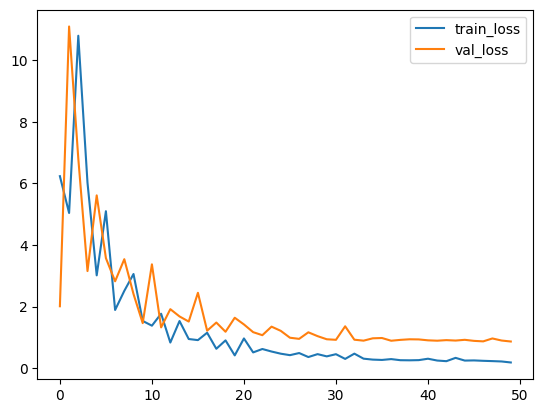

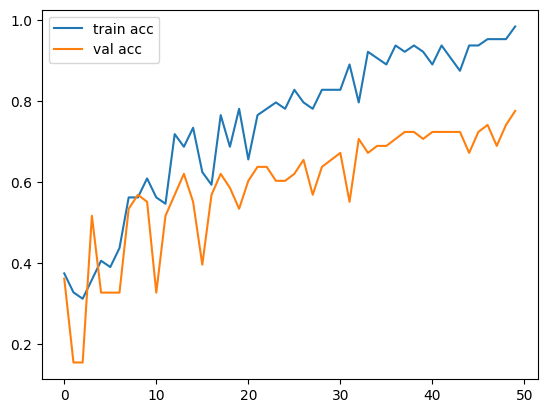

<Figure size 640x480 with 0 Axes>

In [32]:
# plot the loss
plt.plot(r.history['loss'], label = 'train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the summary
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVall_acc')

In [33]:
# save model as h5 file

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [34]:
y_pred = model.predict(test_set)

2/2 [==============================] - 7s 2s/step


In [35]:
y_pred

array([[3.8555115e-02, 8.6786622e-01, 9.3578786e-02],
       [2.3313560e-02, 3.6061248e-01, 6.1607391e-01],
       [6.1940826e-03, 9.7670358e-01, 1.7102327e-02],
       [8.9133061e-02, 7.3640960e-01, 1.7445731e-01],
       [3.6387939e-02, 4.6587642e-03, 9.5895332e-01],
       [1.8804264e-01, 5.0529754e-01, 3.0665985e-01],
       [7.6725078e-03, 9.5873070e-01, 3.3596810e-02],
       [1.8559676e-04, 9.9128342e-01, 8.5309437e-03],
       [6.1394525e-01, 3.2162249e-01, 6.4432308e-02],
       [7.6538818e-06, 8.8065695e-05, 9.9990427e-01],
       [1.4617163e-01, 3.9182183e-01, 4.6200663e-01],
       [1.7795954e-03, 9.9359399e-01, 4.6263398e-03],
       [1.3587661e-03, 8.9591759e-01, 1.0272368e-01],
       [8.0625834e-03, 9.7876269e-01, 1.3174798e-02],
       [4.2615373e-02, 9.4117755e-01, 1.6207095e-02],
       [6.6773109e-02, 4.9474585e-01, 4.3848109e-01],
       [1.5147781e-01, 6.1226773e-01, 2.3625439e-01],
       [3.5075715e-01, 4.3688163e-01, 2.1236123e-01],
       [3.5892087e-01, 9.064

In [53]:
img = image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [54]:
x = image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [194., 188., 174.],
        [215., 209., 197.],
        [241., 235., 223.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [247., 245., 233.],
        [245., 242., 233.],
        [244., 241., 232.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 248., 241.],
        [244., 250., 248.],
        [244., 250., 248.]],

       ...,

       [[190., 206., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[187., 205., 227.],
        [187., 205., 227.],
        [187., 205., 227.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [187., 2

In [55]:
x.shape

(224, 224, 3)

In [56]:
x = x/255

In [57]:
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [58]:
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[0.0032872 , 0.01098697, 0.9857259 ]], dtype=float32)

In [59]:
a = np.argmax(model.predict(img_data),axis=1)

1/1 [==============================] - 0s 150ms/step


In [60]:
a==1

array([False])